In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"The device we are using is : {device}")

The device we are using is : cuda


In [2]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizze_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory already exists ... skipping creating the directory")
else:
    print(f"{image_path} directory created !!")
    image_path.mkdir(exist_ok= True, parents=True)
    
if not os.path.exists(data_path/"pizza_steak_sushi.zip"):

    with open(data_path/"pizza_steak_sushi.zip","wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloaded the zipped data of pizza, steak and sushi data  ...")
        f.write(request.content)

    #unzip the file, pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip","r") as zip_ref:
        print("Unzipping pizza, steak and sushi data  ...")
        zip_ref.extractall(image_path)
else:
    print(f"{data_path}/pizza_steak_sushi.zip FILE EXISTS !!")

data\pizze_steak_sushi directory already exists ... skipping creating the directory
data/pizza_steak_sushi.zip FILE EXISTS !!


In [3]:
train_dir, test_dir = image_path / "train", image_path / "test"
print(f"train_dir : {train_dir}\ntest_dir : {test_dir}")

train_dir : data\pizze_steak_sushi\train
test_dir : data\pizze_steak_sushi\test


data\pizze_steak_sushi\test\sushi\2394442.jpg
Random Image: data\pizze_steak_sushi\test\sushi\2394442.jpg
Image height : 408
Image width : 512
Image size : (512, 408)


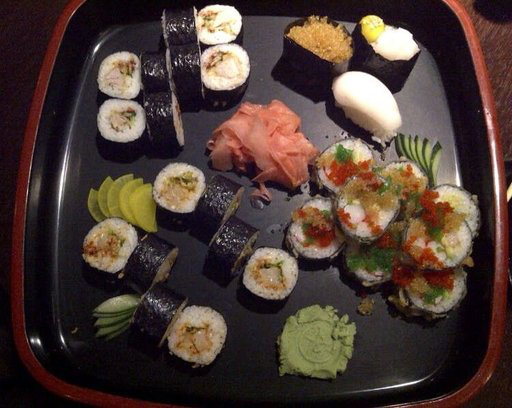

In [4]:
## Lets visualize a random image
import random
from PIL import Image

random.seed(42)

# this basically gets all the images
image_path_list = list(image_path.glob("*/*/*.jpg"))

# lets pick a random image from all the images (image_path_list)

random_image_from_dataset = random.choice(image_path_list)
print(random_image_from_dataset)

img = Image.open(random_image_from_dataset)
print(f"Random Image: {random_image_from_dataset}")
print(f"Image height : {img.height}")
print(f"Image width : {img.width}")
print(f"Image size : {img.size}")
img

Converting the Image to Numpy array: [[[33 13 15]
  [30 10 12]
  [30 10 12]
  ...
  [23 14 19]
  [21 12 17]
  [20 11 16]]

 [[35 15 17]
  [32 12 14]
  [31 11 13]
  ...
  [21 12 17]
  [19 10 15]
  [19 10 15]]

 [[35 15 17]
  [32 12 14]
  [31 11 13]
  ...
  [19 10 15]
  [18  9 14]
  [18  9 14]]

 ...

 [[11  6 12]
  [11  6 12]
  [11  6 12]
  ...
  [34 18 18]
  [33 19 18]
  [31 17 17]]

 [[ 8  3  9]
  [ 9  4 10]
  [ 9  4 10]
  ...
  [36 20 20]
  [32 16 16]
  [27 11 11]]

 [[ 4  0  5]
  [ 5  0  6]
  [ 6  1  7]
  ...
  [36 21 18]
  [32 16 16]
  [25  9  9]]]


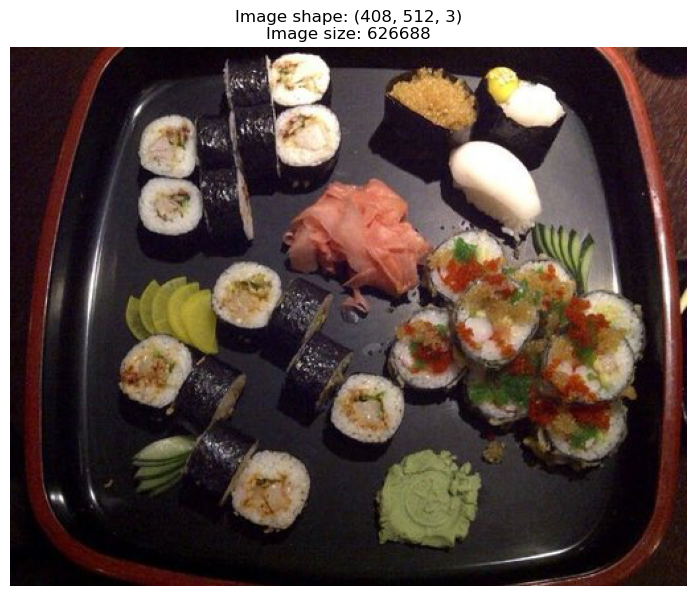

In [5]:


# visualize the data using matplotlib
"""
Inorder to print the image, we need to convert it into numpy array
"""
import matplotlib.pyplot as plt
import numpy as np

random.seed(42)

img_as_array = np.asarray(img)
print(f"Converting the Image to Numpy array: {img_as_array}")
plt.figure(figsize=(10,7))
plt.title(f"Image shape: {img_as_array.shape}\nImage size: {img_as_array.size}")
plt.axis(False)

plt.imshow(img_as_array)

In [6]:
## Since we are working on Pytorch, we need to convert it to Tensor
## We nned to transform the data into the tensor
## We can load the Data using the Dataloader

data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),    
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

In [7]:
data_transform(img) # here we have transformed one image to Tensor

tensor([[[0.1294, 0.1373, 0.1412,  ..., 0.0863, 0.0824, 0.0824],
         [0.1294, 0.1373, 0.1412,  ..., 0.0902, 0.0902, 0.0863],
         [0.1294, 0.1412, 0.1333,  ..., 0.1059, 0.0980, 0.1137],
         ...,
         [0.0118, 0.0196, 0.0157,  ..., 0.1294, 0.1373, 0.1373],
         [0.0275, 0.0275, 0.0275,  ..., 0.1255, 0.1373, 0.1333],
         [0.0314, 0.0314, 0.0275,  ..., 0.1137, 0.1294, 0.1255]],

        [[0.0588, 0.0588, 0.0667,  ..., 0.0392, 0.0392, 0.0431],
         [0.0549, 0.0510, 0.0667,  ..., 0.0392, 0.0431, 0.0314],
         [0.0510, 0.0627, 0.0627,  ..., 0.0471, 0.0471, 0.0392],
         ...,
         [0.0078, 0.0078, 0.0078,  ..., 0.0667, 0.0667, 0.0667],
         [0.0118, 0.0118, 0.0118,  ..., 0.0706, 0.0706, 0.0667],
         [0.0118, 0.0157, 0.0196,  ..., 0.0667, 0.0667, 0.0667]],

        [[0.0667, 0.0706, 0.0667,  ..., 0.0706, 0.0706, 0.0745],
         [0.0784, 0.0824, 0.0863,  ..., 0.0941, 0.0941, 0.0902],
         [0.0824, 0.0863, 0.0941,  ..., 0.0941, 0.1059, 0.

In [8]:
from torchvision import datasets

# Image Folder is a custom inbuilt datasets transform,
# Here we can transform our own custom datasets to Tensor
# In General we use MNIST,CIFAR, etc datasets where we futher transform them into tensors for training and testing
# here we are using prebuilt (ImageFolder) where we can transform our own datasets to Tensors


train_data = datasets.ImageFolder(root=train_dir,   
                                 transform = data_transform)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform = data_transform)

print(f"train_data:{train_data}\ntest_data:{test_data}")

train_data:Dataset ImageFolder
    Number of datapoints: 225
    Root location: data\pizze_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
test_data:Dataset ImageFolder
    Number of datapoints: 75
    Root location: data\pizze_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [9]:
train_data.classes, test_data.classes

(['pizza', 'steak', 'sushi'], ['pizza', 'steak', 'sushi'])

tensor([[[0.1176, 0.0588, 0.0196],
         [0.1216, 0.0588, 0.0196],
         [0.1255, 0.0588, 0.0196],
         ...,
         [0.0980, 0.0745, 0.0902],
         [0.1020, 0.0706, 0.0902],
         [0.1137, 0.0745, 0.0941]],

        [[0.1294, 0.0627, 0.0196],
         [0.1294, 0.0627, 0.0157],
         [0.1294, 0.0627, 0.0196],
         ...,
         [0.0980, 0.0745, 0.0902],
         [0.0980, 0.0706, 0.0863],
         [0.1059, 0.0706, 0.0902]],

        [[0.1333, 0.0706, 0.0196],
         [0.1333, 0.0706, 0.0157],
         [0.1333, 0.0706, 0.0157],
         ...,
         [0.0941, 0.0745, 0.0902],
         [0.0980, 0.0745, 0.0902],
         [0.1020, 0.0706, 0.0902]],

        ...,

        [[0.1686, 0.2392, 0.1804],
         [0.1647, 0.2392, 0.1882],
         [0.1686, 0.2510, 0.1961],
         ...,
         [0.1255, 0.1373, 0.1490],
         [0.1098, 0.1333, 0.1333],
         [0.1098, 0.1255, 0.1294]],

        [[0.1686, 0.2314, 0.1804],
         [0.1647, 0.2392, 0.1843],
         [0.

Text(0.5, 1.0, 'pizza')

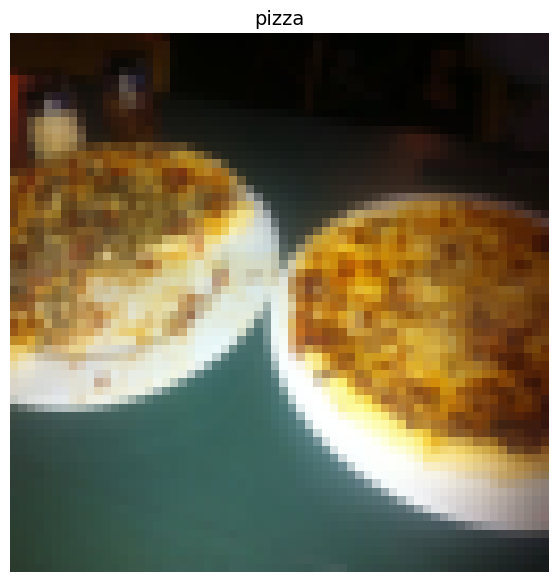

In [10]:
# Let us visualize one image from the training dataset

img_permuted = train_data[0][0]
img_permuted = img_permuted.permute(1,2,0)
print(img_permuted)

print(f"We did image permute since matplotlib considers the dimensions as H,W,C whereas in pytorch its N,C,H,W")
print(f"Original Tensor Dimension : {train_data[0][0].shape}\nimg_permuted size: {img_permuted.shape}")


plt.figure(figsize=(10,7))
#plt.show(img_permuted)
plt.imshow(img_permuted)
plt.axis("off")
plt.title(train_data.classes[int(train_data[0][1])],fontsize=14)

In [11]:
print(f"train_data[0][0] Tensor : {train_data[0][0]}")
print(f"train_data[0][0] Shape : {train_data[0][0].shape}")
print(f"train_data[0][0] DataType : {train_data[0][0].dtype}")
print(f"train_data[0][0] Label : {train_data[0][1]}")

train_data[0][0] Tensor : tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902

In [12]:
# Turn the test and train data into Tensors
import os 
from torch.utils.data import DataLoader

batch_SIZE = 1

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=batch_SIZE,
                              num_workers=1,
                              shuffle=True
                              )

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=batch_SIZE,
                              num_workers=1,
                              shuffle=False
                              )

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x219268b4ac0>,
 <torch.utils.data.dataloader.DataLoader at 0x219268b4a60>)

In [13]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [14]:
def plot_tensors(image_tensor):
    
    img_permuted = image_tensor[0][0]
    img_permuted = img_permuted.permute(1,2,0)
    #print(img_permuted)
    # print(f"We did image permute since matplotlib considers the dimensions as H,W,C whereas in pytorch its N,C,H,W")
    # print(f"Original Tensor Dimension : {train_data[0][0].shape}\nimg_permuted size: {img_permuted.shape}")


    plt.figure(figsize=(3,3))
    #plt.show(img_permuted)
    plt.imshow(img_permuted)
    plt.axis("off")
    plt.title(train_data.classes[int(image_tensor[1])],fontsize=14)

img shape : torch.Size([1, 3, 64, 64])
label len : torch.Size([1])
Total Tensors in the train_dataloader : 225


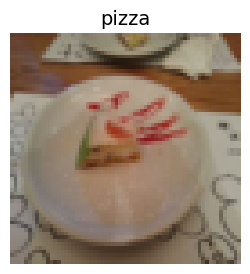

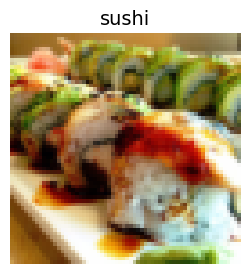

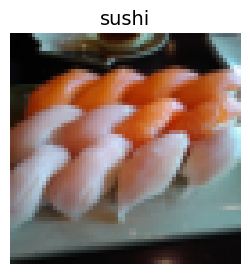

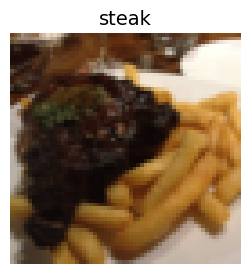

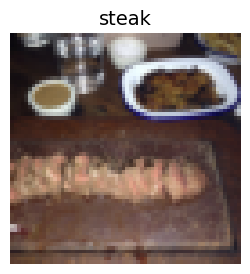

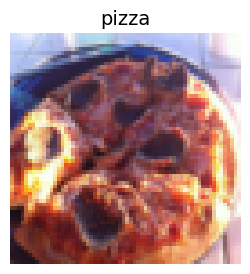

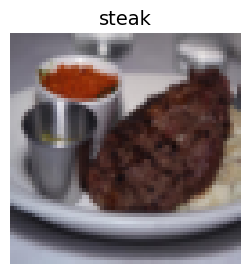

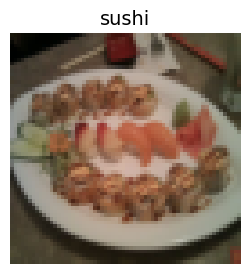

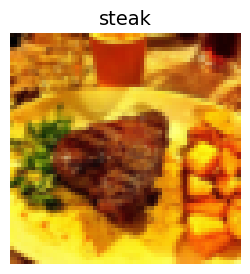

In [15]:
# Lets visualize the train dataloader for the first 10 Tensors
# we cannot access an element using train_dataloader[0]
# since dataloader is a yield, it doesn not implement the getitem object
# so we pass an iter and access each item..

img, label = next(iter(train_dataloader))
print(f"img shape : {img.shape}")
print(f"label len : {label.shape}")

total_tensors_read = 0
for i in train_dataloader:
    total_tensors_read+=1
    if total_tensors_read < 10:
        plot_tensors(i)

    #print(i)    

print(f"Total Tensors in the train_dataloader : {total_tensors_read}")

img shape : torch.Size([1, 3, 64, 64])
label len : torch.Size([1])
Total Tensors in the test_dataloader : 75


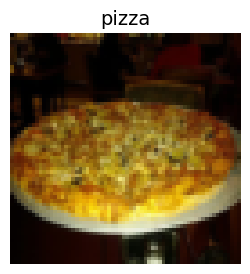

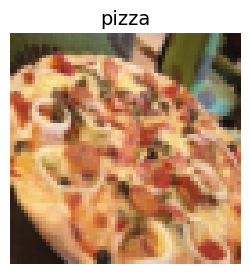

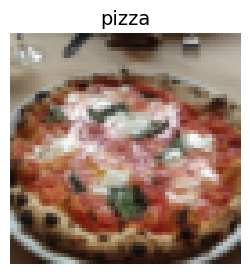

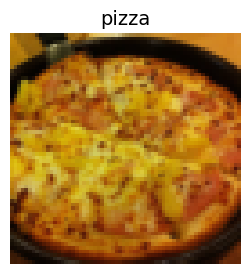

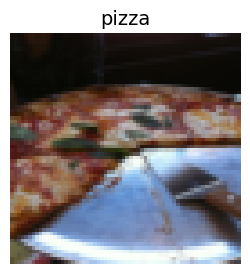

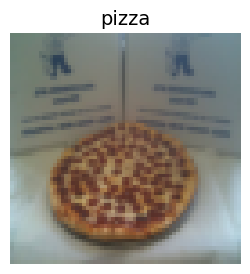

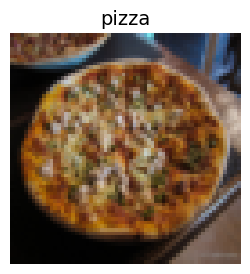

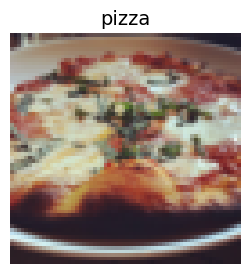

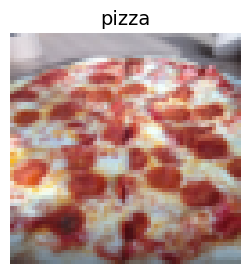

In [16]:
# Lets visualize the test dataloader for the first 10 Tensors
# we cannot access an element using train_dataloader[0]
# since dataloader is a yield, it doesn not implement the getitem object
# so we pass an iter and access each item..

img, label = next(iter(test_dataloader))
print(f"img shape : {img.shape}")
print(f"label len : {label.shape}")

total_tensors_read = 0
for i in test_dataloader:
    total_tensors_read+=1
    if total_tensors_read < 10:
        plot_tensors(i)

    #print(i)    

print(f"Total Tensors in the test_dataloader : {total_tensors_read}")

In [17]:
# create a custom dataset and dataloaders

import os,pathlib,torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms


In [18]:
target_directory = train_dir
print(f"target_directory : {target_directory}")

# class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
# class_names_found

def find_classes(directory):

    classes = sorted([entry.name for entry in list(os.scandir(target_directory)) if entry.is_dir()])

    class_to_idx = {class_name:idx for idx,class_name in enumerate(classes)}

    return classes,class_to_idx

target_directory : data\pizze_steak_sushi\train


In [19]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [20]:
## Data Augmentation

"""
It is process where we include few more data by taking current data by changing its properties

Eg: Let us think we have an image dataset.
I will be taking an image and I will flip it or rotate it or crop it or chaging the color intesnity
1)Flip
2)Crop
3)Rotate
4)Change Image Color Intensity, these all come under the Data Augmentation
"""


'\nIt is process where we include few more data by taking current data by changing its properties\n\nEg: Let us think we have an image dataset.\nI will be taking an image and I will flip it or rotate it or crop it or chaging the color intesnity\n1)Flip\n2)Crop\n3)Rotate\n4)Change Image Color Intensity, these all come under the Data Augmentation\n'

In [21]:
"""
TrivialAugmentWide uses basic image transformations, which might include:

Rotation: Rotates the image by a random angle.
Translation: Shifts the image horizontally or vertically.
Shearing: Skews the image along the x-axis or y-axis.
Brightness: Adjusts the brightness of the image.
Contrast: Adjusts the contrast of the image.
Sharpness: Changes the sharpness of the image.
Color: Alters the color balance of the image.

"""

'\nTrivialAugmentWide uses basic image transformations, which might include:\n\nRotation: Rotates the image by a random angle.\nTranslation: Shifts the image horizontally or vertically.\nShearing: Skews the image along the x-axis or y-axis.\nBrightness: Adjusts the brightness of the image.\nContrast: Adjusts the contrast of the image.\nSharpness: Changes the sharpness of the image.\nColor: Alters the color balance of the image.\n\n'

In [22]:
train_transform = transforms.Compose([
                                        transforms.Resize(size=(224,224)),
                                        transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                        transforms.ToTensor()
])

test_transform = transforms.Compose([
                                        transforms.Resize(size=(224,224)),
                                        transforms.ToTensor()
])



In [23]:
# lets construct a model..
simple_transform = transforms.Compose([
                                 transforms.Resize(size=(64,64)),
                                 transforms.ToTensor()
])



In [24]:
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                         transform=simple_transform)


BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=False
                                    )

In [25]:
len(train_dataloader_simple) # 225 DataPoints and 32 Batch Size = (225/32 =~ 8)

8

In [26]:
class TinyVGG(nn.Module):

        def __init__(self,input_shape,hidden_units,output_shape):
                super().__init__()
                self.conv_block_1 = nn.Sequential(
                                nn.Conv2d
                                (       in_channels=input_shape, 
                                        out_channels=hidden_units,
                                        kernel_size=3,
                                        stride=1,
                                        padding=0
                                ),
                                nn.ReLU(),
                                nn.Conv2d(
                                        in_channels=hidden_units, 
                                        out_channels=hidden_units,
                                        kernel_size=3,
                                        stride=1,
                                        padding=0
                                ),
                                nn.ReLU(),
                                nn.MaxPool2d(kernel_size=2,stride=2) 

                )

                self.conv_block_2 = nn.Sequential(
                                nn.Conv2d
                                (       in_channels=hidden_units, 
                                        out_channels=hidden_units,
                                        kernel_size=3,
                                        stride=1,
                                        padding=0
                                ),
                                nn.ReLU(),
                                nn.Conv2d(
                                        in_channels=hidden_units, 
                                        out_channels=hidden_units,
                                        kernel_size=3,
                                        stride=1,
                                        padding=0
                                ),
                                nn.ReLU(),
                                nn.MaxPool2d(kernel_size=2,stride=2) 
                )

                self.classifier = nn.Sequential(
                nn.Flatten(),
                nn.Linear(in_features=hidden_units * 13 * 13,
                        out_features=output_shape)
                )

        def forward(self,x):
                
                x = self.conv_block_1(x)
                #print(f"Output Shape of conv_block_1 : {x.shape}")

                x = self.conv_block_2(x)
                #print(f"Output Shape of conv_block_2 : {x.shape}")
                
                x = self.classifier(x)
                #print(f"Output Shape of Final Layer : {x.shape}")

                return x

In [27]:
device, device.type

(device(type='cuda'), 'cuda')

In [28]:
torch.manual_seed(42)

model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=3).to(device.type)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [29]:
img_batch, label_batch = next(iter(train_dataloader_simple))
img_batch.shape, label_batch.shape, 

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [30]:
model_0(img_batch.to(device.type))

tensor([[ 2.0789e-02, -1.9351e-03,  9.5317e-03],
        [ 1.8427e-02,  2.4670e-03,  6.6757e-03],
        [ 1.7699e-02,  1.0262e-03,  9.4657e-03],
        [ 2.4441e-02, -3.3526e-03,  9.6011e-03],
        [ 1.9930e-02,  6.6315e-04,  1.0779e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0047e-03],
        [ 2.0999e-02,  1.2869e-04,  1.2473e-02],
        [ 2.1577e-02, -1.9507e-03,  9.6941e-03],
        [ 2.4504e-02, -4.7745e-03,  8.5280e-03],
        [ 2.0252e-02, -4.7292e-04,  1.0908e-02],
        [ 2.2215e-02, -4.1838e-04,  9.8123e-03],
        [ 2.2313e-02, -2.1622e-03,  9.4455e-03],
        [ 2.1841e-02, -3.7132e-03,  8.3783e-03],
        [ 2.2863e-02, -1.7724e-03,  1.0287e-02],
        [ 2.1647e-02, -4.4139e-03,  9.5022e-03],
        [ 2.2096e-02, -4.1426e-03,  9.3853e-03],
        [ 2.1209e-02, -4.4219e-03,  1.1475e-02],
        [ 2.1711e-02, -2.7656e-03,  8.5006e-03],
        [ 1.9951e-02,  2.8268e-05,  8.4380e-03],
        [ 1.8298e-02,  1.6306e-03,  8.5499e-03],
        [ 2.0768e-02

In [31]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0,input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [32]:
 # lets write a train function

def train_step(model,dataloader,loss_fn,optimizer,device):

    model.train()

    train_loss, train_acc = 0.0 ,  0.0

    for batch, (X,y) in enumerate(dataloader):

        #1 Zero Grad the Current optimizer
        optimizer.zero_grad()

        # set the data in cude 
        X,y = X.to(device), y.to(device)

        # run the model on the input data 
        y_pred = model(X)

        # Validate the loss Predicted(y_pred) vs Actual data(y)
        loss = loss_fn(y_pred , y)

        #aggregate the training loss
        train_loss += loss.item()

        #BackWard Propogation update the weights
        loss.backward()

        #optimize the loss
        optimizer.step()

        # Calculate and accumulate accuracy metrics across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
    

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)

    return train_loss, train_acc



In [33]:
 # lets write a test function

def test_step(model,dataloader,loss_fn):

    # Put model in eval mode
    model.eval() 

    test_loss, test_acc = 0.0 ,  0.0

    with torch.no_grad():   

        for batch, (X,y) in enumerate(dataloader):

            # set the data in cude 
            X,y = X.to(device), y.to(device)

            # run the model on the input data 
            y_pred = model(X)

            # Validate the loss Predicted(y_pred) vs Actual data(y)
            loss = loss_fn(y_pred , y)

            #aggregate the training loss
            test_loss += loss.item()

            # Calculate and accumulate accuracy metrics across all batches
            test_pred_labels  = y_pred.argmax(dim=1)
            test_acc += (test_pred_labels  == y).sum().item()/len(test_pred_labels )
    

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)

    return test_loss, test_acc

In [34]:
from tqdm.auto import tqdm

def train(model,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn,
          epochs,
          device):

      print(f"Training and Testing on the device : {device}")

      # Create empty results dictionary
      results = {  
                  "train_loss": [],
                  "train_acc": [],
                  "test_loss": [],
                  "test_acc": []
                }
      
      # loop through the epochs
      for epoch in tqdm(range(epochs)):
            train_loss, train_acc = train_step(model=model,
                                               dataloader=train_dataloader,
                                               loss_fn=loss_fn,
                                               optimizer=optimizer,
                                               device=device)
            
            test_loss, test_acc = test_step(model=model,
                                            dataloader=test_dataloader,
                                            loss_fn=loss_fn,
                                           )
            
            print(f"Epoch: {epoch+1} | "
                  f"train_loss: {train_loss:.4f} | "
                  f"train_acc: {train_acc:.4f} | "
                  f"test_loss: {test_loss:.4f} | "
                  f"test_acc: {test_acc:.4f}")


            # Ensure all data is moved to CPU and converted to float for storage
            results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
            results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
            results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
            results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)
      
      return results

In [35]:
# evaluate the model

torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)
                  ).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr=0.001
                            )

#train our model
model_0_results = train(model=model_0,
      train_dataloader = train_dataloader_simple,
      test_dataloader = train_dataloader_simple,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=NUM_EPOCHS,
      device=device
      )
print("Training Has been done !!")


Training and Testing on the device : cuda


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1063 | train_acc: 0.3047 | test_loss: 1.0956 | test_acc: 0.5703
Epoch: 2 | train_loss: 1.0835 | train_acc: 0.4453 | test_loss: 1.0805 | test_acc: 0.4023
Epoch: 3 | train_loss: 1.1042 | train_acc: 0.2812 | test_loss: 1.0687 | test_acc: 0.4023
Epoch: 4 | train_loss: 1.0752 | train_acc: 0.4805 | test_loss: 1.0519 | test_acc: 0.5273
Epoch: 5 | train_loss: 1.0638 | train_acc: 0.3945 | test_loss: 1.0390 | test_acc: 0.3984
Training Has been done !!


In [36]:
for key,value in model_0_results.items():
    print(f"{key} : {value}\n")

train_loss : [1.1063424199819565, 1.08347749710083, 1.104153349995613, 1.0752147883176804, 1.0638332664966583]

train_acc : [0.3046875, 0.4453125, 0.28125, 0.48046875, 0.39453125]

test_loss : [1.0955625623464584, 1.0805053263902664, 1.0687466338276863, 1.0519250184297562, 1.038978561758995]

test_acc : [0.5703125, 0.40234375, 0.40234375, 0.52734375, 0.3984375]



In [37]:
## Create training transform with TrivialAugment

from torchvision import transforms

"""

TrivialAugmentWide uses basic image transformations, which might include:

Rotation: 
Rotates the image by a random angle.

Translation: 
Shifts the image horizontally or vertically.

Shearing: 
Skews the image along the x-axis or y-axis.

Brightness: 
Adjusts the brightness of the image.

Contrast: 
Adjusts the contrast of the image.

Sharpness: 
Changes the sharpness of the image.

Color: 
Alters the color balance of the image.

"""

train_transform_trivial = transforms.Compose([
                                            transforms.Resize(size=(64,64)),
                                            transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                            transforms.ToTensor()
                                            ])

# test dataset doesnt need augmentation
test_transform = transforms.Compose([
                                            transforms.Resize(size=(64,64)),
                                            transforms.ToTensor()
                                    ])

In [38]:
# Create train and test dataset and dataloaders for dataaugmnetation

train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial
                                            )

test_data_simple = datasets.ImageFolder(root=test_dir,
                                           transform=test_transform
                                          )

In [39]:
# kets print our datasets for train and testing
print(f"train_data_augmented : {train_data_augmented}\n\ntest_data_simple : {test_data_simple}")

train_data_augmented : Dataset ImageFolder
    Number of datapoints: 225
    Root location: data\pizze_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
               ToTensor()
           )

test_data_simple : Dataset ImageFolder
    Number of datapoints: 75
    Root location: data\pizze_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [40]:
# turn datasets to dataloaders

BATCH_SIZE = 32
NUM_WORKERS = 6

torch.manual_seed(42)

train_dataloader_augmented = DataLoader(dataset = train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple  = DataLoader(dataset = test_data_simple,
                                        batch_size=BATCH_SIZE,
                                        shuffle=False,
                                        num_workers=NUM_WORKERS)

In [41]:
# for train 225//32 ~= 8, for test 75//32 ~=3
len(train_dataloader_augmented), len(test_dataloader_simple) 

(8, 3)

In [42]:
## Create model for out augmented data
torch.manual_seed(42)

model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [43]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(
                             params=model_1.parameters(),
                             lr=0.001
                            )

model_1_results = train(
                        model = model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device
                       )

print("Training Has been done for Augmented Dataset !!")

Training and Testing on the device : cuda


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1045 | train_acc: 0.2500 | test_loss: 1.1015 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0765 | train_acc: 0.4258 | test_loss: 1.1299 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0735 | train_acc: 0.4258 | test_loss: 1.1669 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1155 | train_acc: 0.3047 | test_loss: 1.1552 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0709 | train_acc: 0.5000 | test_loss: 1.1459 | test_acc: 0.3229
Training Has been done for Augmented Dataset !!


In [44]:
!nvidia-smi

Sat Nov  9 18:13:03 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.03                 Driver Version: 566.03         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2060      WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   66C    P3             20W /   80W |     625MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [45]:
print(f"model_1_results\n")
for key,value in model_1_results.items():
    print(f"{key} : {value}\n")

model_1_results

train_loss : [1.1045330613851547, 1.0764963924884796, 1.0735344141721725, 1.1154767572879791, 1.0709456652402878]

train_acc : [0.25, 0.42578125, 0.42578125, 0.3046875, 0.5]

test_loss : [1.1015070676803589, 1.1299278338750203, 1.1669362386067708, 1.1552460193634033, 1.1459317008654277]

test_acc : [0.2604166666666667, 0.2604166666666667, 0.2604166666666667, 0.2604166666666667, 0.3229166666666667]



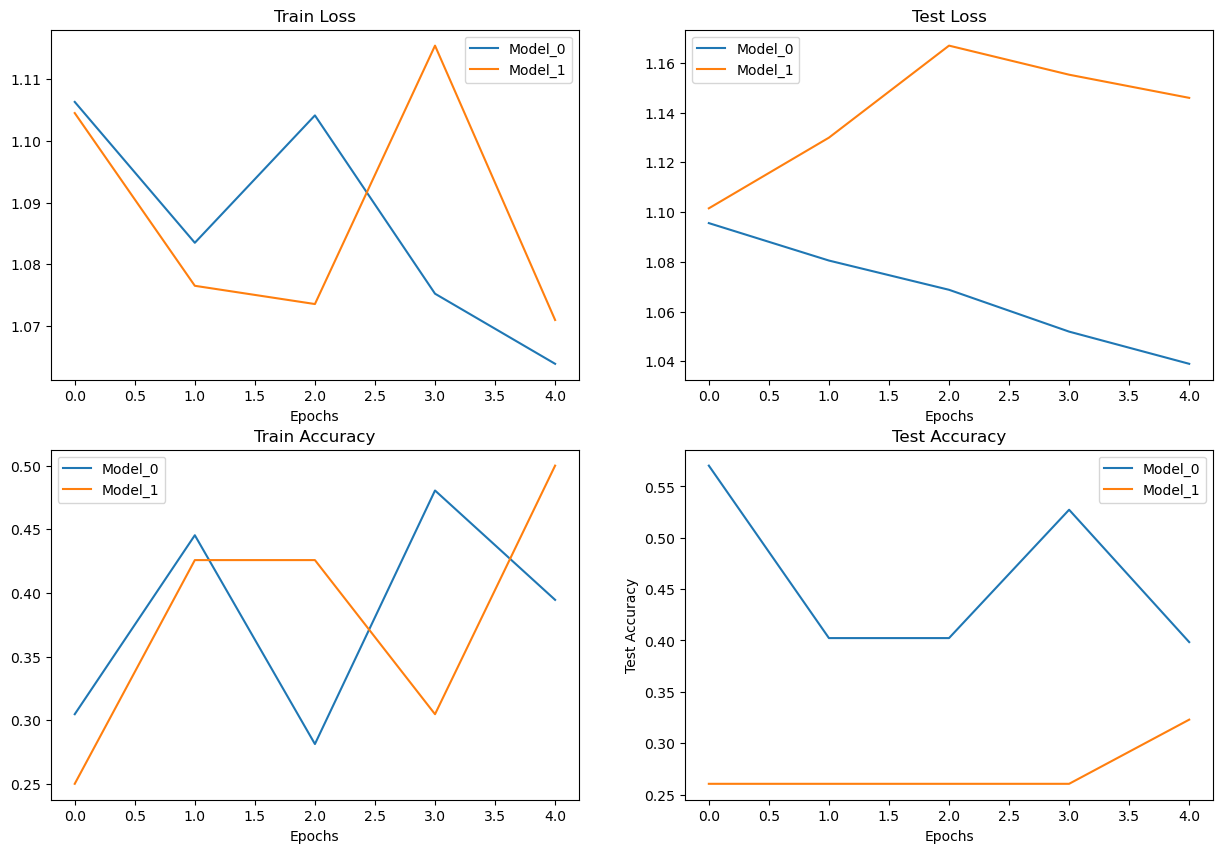

In [46]:
# lets plot the loss

import pandas as pd

# Convert the results into the DataFrames
# model_0_df = pd.DataFrame(model_0_results)
# model_1_df = pd.DataFrame(model_1_results)
# model_0_df, model_1_df

plt.figure(figsize=(15,10))

epochs = range(NUM_EPOCHS)

# Train Loss
plt.subplot(2,2,1)
plt.plot(epochs, model_0_results["train_loss"], label="Model_0")
plt.plot(epochs, model_1_results["train_loss"], label="Model_1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Test Loss
plt.subplot(2,2,2)
plt.plot(epochs, model_0_results["test_loss"], label="Model_0")
plt.plot(epochs, model_1_results["test_loss"], label="Model_1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()


# Train Accuracy
plt.subplot(2,2,3)
plt.plot(epochs, model_0_results["train_acc"], label="Model_0")
plt.plot(epochs, model_1_results["train_acc"], label="Model_1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Test Accuracy
plt.subplot(2,2,4)
plt.plot(epochs, model_0_results["test_acc"], label="Model_0")
plt.plot(epochs, model_1_results["test_acc"], label="Model_1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy")
plt.legend()

Yes! its a file
custom_image Tensor : tensor([[[ 12,  19,  24,  ...,  14,  14,  13],
         [140, 147, 153,  ...,  10,  11,  12],
         [231, 227, 229,  ...,   6,   8,  10],
         ...,
         [188, 194, 201,  ...,  54,  56,  57],
         [187, 192, 200,  ...,  58,  58,  57],
         [191, 193, 199,  ...,  57,  55,  54]],

        [[ 10,  17,  23,  ...,  15,  15,  14],
         [111, 118, 124,  ...,  10,  11,  12],
         [184, 180, 179,  ...,   4,   6,   8],
         ...,
         [125, 131, 138,  ...,  49,  50,  51],
         [124, 129, 137,  ...,  52,  52,  51],
         [128, 130, 136,  ...,  51,  49,  48]],

        [[ 15,  22,  29,  ...,   7,   7,   6],
         [ 69,  76,  82,  ...,  18,  19,  20],
         [132, 128, 128,  ...,   7,   9,  11],
         ...,
         [ 94, 100, 107,  ...,  11,  14,  17],
         [ 93,  98, 106,  ...,  16,  16,  17],
         [ 97,  99, 105,  ...,  15,  13,  14]]], dtype=torch.uint8)
custom_image dtype : torch.uint8
custom_image Sha

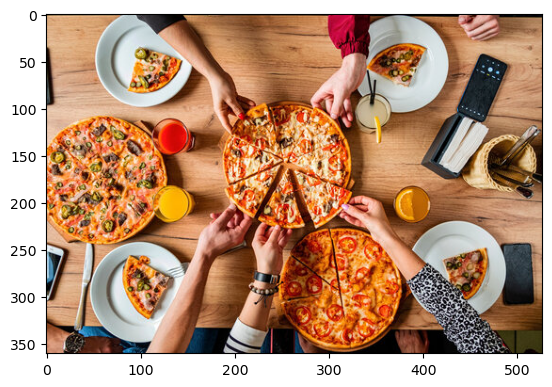

In [47]:
# Lets Given an input which is not part of training set
# A random Image

import torchvision,os

custom_image_path = r"C:\Users\phani\Downloads\Pizza.jpg"

print("Yes! its a file" if os.path.isfile(custom_image_path) else "Not a file")

custom_image = torchvision.io.read_image(custom_image_path)
custom_image

print(f"custom_image Tensor : {custom_image}")
print(f"custom_image dtype : {custom_image.dtype}")
print(f"custom_image Shape : {custom_image.shape}")

plt.imshow(custom_image.permute(1,2,0))

In [48]:
# lets predict with this Image on our dataset..

model_1.eval() # set to evaluation mode
with torch.no_grad():
    #model_1(custom_image.to(device))                           # here we get an error since the dtype for our model is float32
    model_1(custom_image.type(torch.float32).to(device) / 255)  # her we convert the dtype to float32 and divide each value by 255, since our origin al dataset has values in b/2 0 and 1


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x11136 and 1690x3)

In [49]:
custom_image = torchvision.io.read_image(custom_image_path).type(torch.float32)
custom_image = custom_image/ 255

model_1.eval() # set to evaluation mode

with torch.no_grad():
    #model_1(custom_image.to(device))  # here we get an error since the dtype for our model is float32
    model_1(custom_image.to(device) )  # her we convert the dtype to float32 and divide each value by 255, since our origin al dataset has values in b/2 0 and 1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x11136 and 1690x3)

In [50]:
# Create a transform pipeline to reshape our image..

custom_image_transform = transforms.Compose([transforms.Resize(size=(64,64))])

custom_image_transformed = custom_image_transform(custom_image)

# Transform target Image
print(f"Original Custom Image Shape : {custom_image.shape}")
print(f"Transformed Custom Image Shape : {custom_image_transformed.shape}")

Original Custom Image Shape : torch.Size([3, 360, 527])
Transformed Custom Image Shape : torch.Size([3, 64, 64])


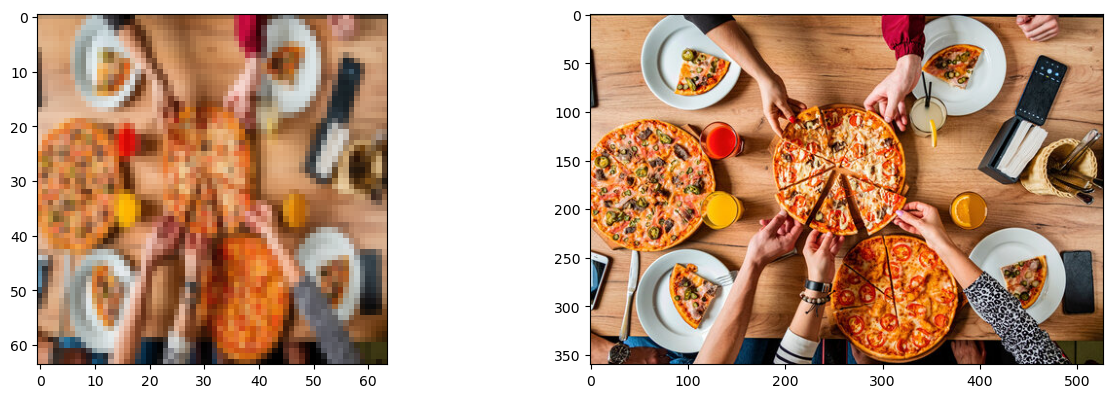

In [51]:
plt.figure(figsize=(15,10))

# Lets plot our transformed image
plt.subplot(2,2,1)
plt.imshow(custom_image_transformed.permute(1,2,0))

# Lets plot our Original  image
plt.subplot(2,2,2)
plt.imshow(custom_image.permute(1,2,0))

In [52]:
# lets evaluate our custom transformed Image

model_1.eval()          # set to eval mode
with torch.no_grad():   # set no grad
    custom_image_pred = model_1(custom_image_transformed.to(device))
    

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x169 and 1690x3)

In [53]:
custom_image_transformed.shape, custom_image_transformed.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [54]:
# lets evaluate our custom transformed Image

model_1.eval()          # set to eval mode
with torch.no_grad():   # set no grad
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))
    

In [55]:
custom_image_pred       # predicted outputs for each class

tensor([[ 0.1223, -0.0532, -0.2158]], device='cuda:0')

In [56]:
# now lets make the probabilities for each class
custom_image_pred_probability = torch.softmax(custom_image_pred,dim=1)
custom_image_pred_probability


tensor([[0.3918, 0.3288, 0.2794]], device='cuda:0')

In [57]:
torch.max(custom_image_pred_probability,dim=1) # this shows out index 0 has the max prbability

torch.return_types.max(
values=tensor([0.3918], device='cuda:0'),
indices=tensor([0], device='cuda:0'))

In [58]:
# this is our predicted image output.
# it classied as pizza

train_data_augmented.classes[torch.max(custom_image_pred_probability,dim=1).indices.item()]

'pizza'

In [59]:
# Now lets run for 50 Epochs and check out training(Augmented) and testing accuracy and loss

torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS_FIFTY = 50

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(
                             params=model_1.parameters(),
                             lr=0.001
                            )

model_1_results_fifty = train(
                        model = model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS_FIFTY,
                        device=device
                       )

print("Training Has been done for Augmented Dataset !!")

Training and Testing on the device : cuda


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0594 | train_acc: 0.5469 | test_loss: 1.0750 | test_acc: 0.3428
Epoch: 2 | train_loss: 1.0067 | train_acc: 0.5039 | test_loss: 1.0868 | test_acc: 0.3324
Epoch: 3 | train_loss: 0.9684 | train_acc: 0.5234 | test_loss: 1.1071 | test_acc: 0.3220
Epoch: 4 | train_loss: 0.8900 | train_acc: 0.5977 | test_loss: 1.1052 | test_acc: 0.3627
Epoch: 5 | train_loss: 0.8398 | train_acc: 0.6289 | test_loss: 1.0592 | test_acc: 0.3419
Epoch: 6 | train_loss: 1.1797 | train_acc: 0.4102 | test_loss: 1.0389 | test_acc: 0.3523
Epoch: 7 | train_loss: 0.9585 | train_acc: 0.5742 | test_loss: 1.0301 | test_acc: 0.3722
Epoch: 8 | train_loss: 0.9691 | train_acc: 0.6016 | test_loss: 1.0530 | test_acc: 0.3627
Epoch: 9 | train_loss: 0.9808 | train_acc: 0.4531 | test_loss: 1.0902 | test_acc: 0.3731
Epoch: 10 | train_loss: 0.9647 | train_acc: 0.5430 | test_loss: 1.0120 | test_acc: 0.3106
Epoch: 11 | train_loss: 0.8753 | train_acc: 0.5703 | test_loss: 1.0554 | test_acc: 0.3731
Epoch: 12 | train_l

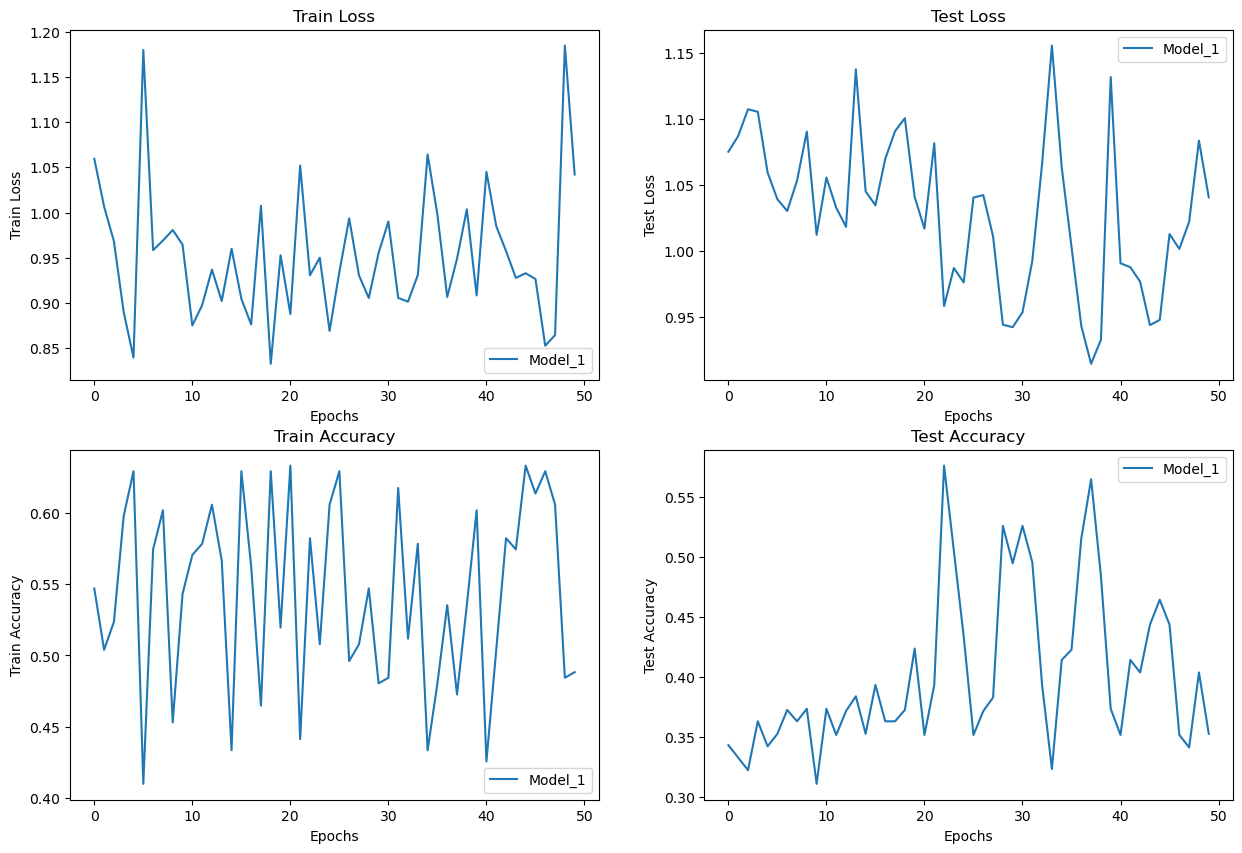

In [61]:
# lets plot the accuracy and loss

import pandas as pd

plt.figure(figsize=(15,10))

epochs = range(NUM_EPOCHS_FIFTY)

# Train Loss
plt.subplot(2,2,1)
plt.plot(epochs, model_1_results_fifty["train_loss"], label="Model_1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Train Loss")
plt.legend()

# Test Loss
plt.subplot(2,2,2)
plt.plot(epochs, model_1_results_fifty["test_loss"], label="Model_1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Test Loss")
plt.legend()


# Train Accuracy
plt.subplot(2,2,3)
plt.plot(epochs, model_1_results_fifty["train_acc"], label="Model_1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Train Accuracy")
plt.legend()

# Test Accuracy
plt.subplot(2,2,4)
plt.plot(epochs, model_1_results_fifty["test_acc"], label="Model_1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy")
plt.legend()

In [62]:
# lets evaluate our custom transformed Image

model_1.eval()          # set to eval mode
with torch.no_grad():   # set no grad
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))

In [65]:
custom_image_pred

tensor([[ 0.5840, -1.2107, -0.4365]], device='cuda:0')

In [67]:
# this is our predicted image output.
# it classied as pizza
custom_image_pred_probability = torch.softmax(custom_image_pred,dim=1)
print(f"custom_image_pred_probability : {custom_image_pred_probability}")

train_data_augmented.classes[torch.max(custom_image_pred_probability,dim=1).indices.item()]

custom_image_pred_probability : tensor([[0.6551, 0.1089, 0.2361]], device='cuda:0')


'pizza'